### **CC57 - MACHINE LEARNING - CLASIFICADORES ENSAMBLADOS**

### **Actividad #5: Detección de infedilidad en un matrimonio**


Los datos provienen de statsmodels disponible en: https://www.statsmodels.org/stable/index.html

El conjunto de datos contiene informacion sobre las caracteriticas de la esposa en la relacion marital (edad, religion, numero de hijos, educacion, ocupacion,  cantidad de infidelidades, etc). Este conjunto de datos se puede tratar como un problema de clasificación creando una nueva variable binaria infiel (¿la esposa tuvo al menos una infidelidad?) e intentando predecir la clasificación para cada esposa.


El conjunnto de datos **infiel.csv** contempla 6366 observaciones en 9 variables.  Su estructura es la siguiente:

**- 1. rate_marriage:**woman's rating of her marriage (1 = very poor, 5 = very good)

**- 2. age:** woman's age

**- 3. yrs_married:**number of years married

**- 4. children:** number of children

**- 5. religious:** woman's rating of how religious she is (1 = not religious, 4 = strongly religious)

**- 6. educ:** level of education (9 = grade school, 12 = high school, 14 = some college, 16 = college graduate, 17 = some graduate school, 20 = advanced degree)

**- 7. occupation:** woman's occupation (1 = student, 2 = farming/semi-skilled/unskilled, 3 = "white collar", 4 = teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 = professional with advanced degree)

**- 8. occupation_husb:** husband's occupation (same coding as above)

**- 9. affairs:** time spent in extra-marital affairs

Se solicita lo siguiente:

- 0. Cargar de librerias
- 1. Cargar los datos y analisis exploratorio de los datos
- 2. Preprocesamiento de los datos
- 3. Creando los modelos ENSAMBLADOS

   -- 3.1 **Identificacion de Modelos a ensamblar**
      
      Determinar que clasificadores utilizar en los dos primeros tipos de Ensamble (Bagging y Boosting) a partir de la comparacion de clasificadores obtenidos mediante la libreria **pycaret** (compare_models).
      
   -- 3.2 **Crear (3) modelos ENSAMBLADOS** para predecir si una esposa es o no infiel dentro de la relacion marital.

    -  **Tipo de Ensamble #1:** Bagging  
    -  **Tipo de Ensamble #2:** Boosting
    -  **Tipo de Ensamble #3:** Random Forest

- 4. Evaluar el rendimiento de los modelos obtenidos (explique sus conclusiones)



## <font color=blue>0. Cargar Librerias</font>


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## <font color=blue>1. Carga y Analisis Exploratorio de los Datos</font>


In [2]:
#Cargar archivo de datos
data = pd.read_csv("infiel.csv")

In [3]:
#Visualizar primeros registros del conjunto de datos
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


### **Análisis de las medidas de tendencia/estadistica**

In [4]:
#Visualizar las medidas de tendencias y estadísticas descriptivas
data.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991


<Axes: >

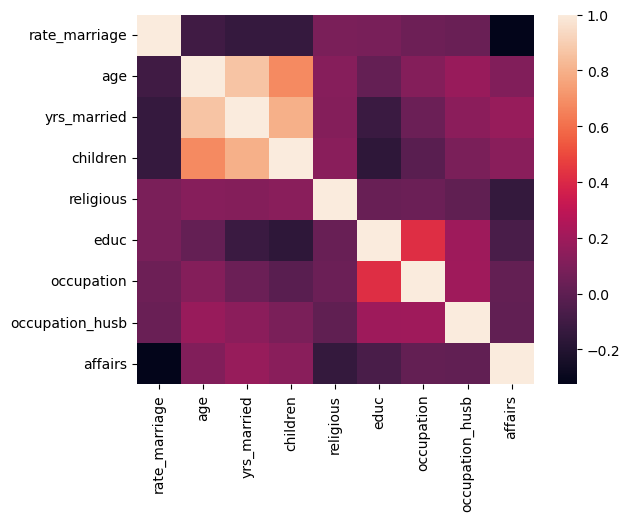

### **Visualizacion de los atributos predictoras y de infidelidad (target)**

In [16]:
#visualizacion de los atributos predictoras e infidelidad (target)
data.loc[:,['rate_marriage','age','yrs_married', 'children','religious', 'educ', 'occupation','occupation_husb','affairs']].corr(method = "spearman")

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
rate_marriage,1.000000,-0.099419,-0.138307,-0.135559,0.085139,0.081484,0.043425,0.033114,-0.324958
age,-0.099419,1.000000,0.863842,0.678820,0.125024,0.020795,0.115983,0.177311,0.105706
yrs_married,-0.138307,0.863842,1.000000,0.795219,0.115750,-0.121690,0.039858,0.139457,0.172455
children,-0.135559,0.678820,0.795219,1.000000,0.131155,-0.163694,-0.015865,0.084213,0.131229
religious,0.085139,0.125024,0.115750,0.131155,1.000000,0.027973,0.039630,0.002964,-0.140468
educ,0.081484,0.020795,-0.121690,-0.163694,0.027973,1.000000,0.417784,0.195873,-0.066809
occupation,0.043425,0.115983,0.039858,-0.015865,0.039630,0.417784,1.000000,0.202511,0.012616
occupation_husb,0.033114,0.177311,0.139457,0.084213,0.002964,0.195873,0.202511,1.000000,0.007177
affairs,-0.324958,0.105706,0.172455,0.131229,-0.140468,-0.066809,0.012616,0.007177,1.000000


## <font color=blue>2. Preprocesamiento de los datos</font>

### **Verificar datos faltantes y/o duplicados**

###**Comprobación del desequilibrio o desbalance del atributo objetivo**

In [17]:
#comprobación de desequilibrio o desabalance 
data['affairs'].value_counts()

affairs
0.000000     4313
1.400000      118
0.583333       86
0.400000       72
1.333333       72
             ... 
3.878787        1
7.111111        1
39.199982       1
4.923077        1
57.599991       1
Name: count, Length: 77, dtype: int64

###**Comprobación de estadísticas**


In [19]:
#comprobación de estadisticas
data['affairs'].describe()

count    6366.000000
mean        0.705374
std         2.203374
min         0.000000
25%         0.000000
50%         0.000000
75%         0.484848
max        57.599991
Name: affairs, dtype: float64

###**Comprobación y eliminación de valores atípicos**

In [8]:
!pip install missingno

### **Separar variables predictoras y el atributo destino de los datos**

In [ ]:
#Separar variables predictoras y el atributo destino de los datos
X = data.drop('affairs', axis=1)
y = data['affairs']


###**`Scaling de los datos de entrenamiento`**

###**Comprobar la correlación entre características**

In [ ]:
sns.heatmap(data.loc[:,['rate_marriage','age','yrs_married', 'children','religious', 'educ', 'occupation','occupation_husb','affairs']].corr(method = "spearman"))

## <font color=blue>3. Creando los modelos ENSAMBLADOS </font>

###**3.1 Identificacion de Modelos a ensamblar**

In [ ]:
#Instalamos la libreria pycaret
#!pip install pycaret
!pip install git+https://github.com/pycaret/pycaret.git@master --upgrade



In [ ]:
#Setup o configuracion utilizando pycaret.  El setup lo almacenamos en la variable clf1 o clasificador 1
#Se debe indicar el dataset y el atributo salida u objetivo
#Ref: https://pycaret.readthedocs.io/en/latest/api/classification.html



In [ ]:
#Determinamos aquellos modelos que no deseamos se incluyan

###**3.2 Creacion de Modelos Ensamblados**

#### - **Tipo de Ensamble #1: Bagging**



In [ ]:
#Importamos las librerias necesarias



In [ ]:
#Inicializamos el clasificador



In [ ]:
#Entrenando con el conjunto de datos de entrenamiento



In [ ]:
#Probando y evaluando el clasificador



#### - **Tipo de Ensamble #2: Boosting**

In [ ]:
#Importamos las librerias necesarias


In [ ]:
#Inicializamos el clasificador


In [ ]:
#Entrenando con el conjunto de datos de entrenamiento


In [ ]:
#Probando y evaluando el clasificador



#### - **Tipo de Ensamble #3: Random Forest**

In [ ]:
#Importamos las librerias necesarias



In [ ]:
#Inicializamos el clasificador



In [ ]:
#Entrenando con el conjunto de datos de entrenamiento



In [ ]:
#Probando y evaluando el clasificador



## <font color=blue>4. Evaluar/Comparar rendimiento de los modelos ensamblados</font>
- Explique sus conclusiones
<br>